In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/Month_Value_1.csv', index_col=0).dropna()
df1 = df


# Scale the data 

In [3]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
df = trans.fit_transform(df)
df_trans = pd.DataFrame(df, columns=['Revenue', 'Sales_quantity', 'average_cost', 'average_annual_payroll_region'])
df_trans


,Revenue,Sales_quantity,average_cost,average_annual_payroll_region
0,0.044453,0.148378,0.101596,1.000000
1,0.039926,0.111645,0.171134,1.000000
2,0.179405,0.255688,0.189211,1.000000
3,0.107144,0.232331,0.086302,1.000000
4,0.000000,0.010284,0.356200,1.000000
...,...,...,...,...
59,1.000000,1.000000,0.298770,0.944179
60,0.944827,0.634179,0.662684,0.625820
61,0.585755,0.510670,0.414481,0.625820
62,0.804754,0.815157,0.293567,0.625820


In [4]:
date = pd.read_csv('./data/Month_Value_1.csv').dropna().iloc[:,:1]
date


,Period
0,01.01.2015
1,01.02.2015
2,01.03.2015
3,01.04.2015
4,01.05.2015
...,...
59,01.12.2019
60,01.01.2020
61,01.02.2020
62,01.03.2020


In [5]:
df_trans = pd.concat([date, df_trans], axis= 1)
# df_trans['Period'] = pd.to_datetime(df_trans['Period'])
df_trans.set_index(keys='Period', inplace= True)
df_trans

,Revenue,Sales_quantity,average_cost,average_annual_payroll_region
Period,,,,
01.01.2015,0.044453,0.148378,0.101596,1.000000
01.02.2015,0.039926,0.111645,0.171134,1.000000
01.03.2015,0.179405,0.255688,0.189211,1.000000
01.04.2015,0.107144,0.232331,0.086302,1.000000
01.05.2015,0.000000,0.010284,0.356200,1.000000
...,...,...,...,...
01.12.2019,1.000000,1.000000,0.298770,0.944179
01.01.2020,0.944827,0.634179,0.662684,0.625820
01.02.2020,0.585755,0.510670,0.414481,0.625820


<Axes: xlabel='Period'>

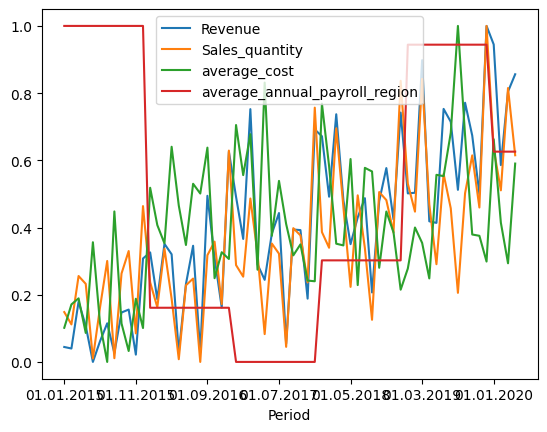

In [6]:
df_trans.plot()

In [7]:
# Using plotly.express
import plotly.express as px

fig = px.line(df_trans)
fig.show()

In [8]:
df_trans.corr()

,Revenue,Sales_quantity,average_cost,average_annual_payroll_region
Revenue,1.000000,0.887570,0.358278,-0.007111
Sales_quantity,0.887570,1.000000,-0.093599,0.103704
average_cost,0.358278,-0.093599,1.000000,-0.305145
average_annual_payroll_region,-0.007111,0.103704,-0.305145,1.000000


In [9]:
df1.corr()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Revenue,1.000000,0.887570,0.358278,-0.007111
Sales_quantity,0.887570,1.000000,-0.093599,0.103704
Average_cost,0.358278,-0.093599,1.000000,-0.305145
The_average_annual_payroll_of_the_region,-0.007111,0.103704,-0.305145,1.000000


# Train and test split 80/20


In [10]:
# split and test
train_sz = int(.8*len(df_trans))
test_sz = len(df_trans) - train_sz 
df_train = df_trans.iloc[:train_sz,:]
df_test = df_trans.iloc[train_sz:,:]

<Axes: xlabel='Period'>

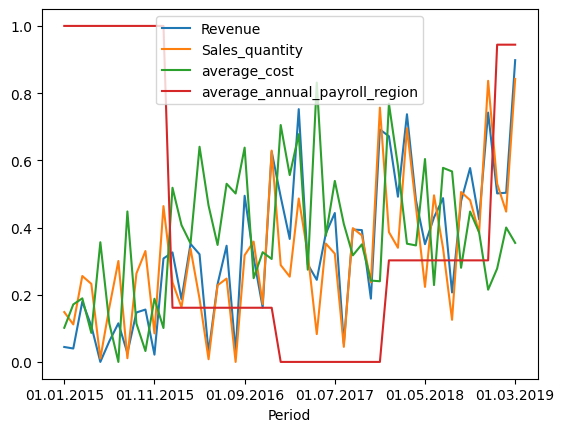

In [11]:
df_train.plot()

<Axes: xlabel='Period'>

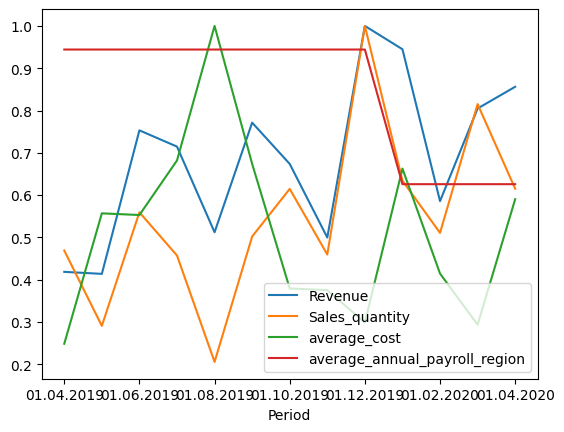

In [12]:
df_test.plot()

# Linear Regression

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_train.Revenue.values
y = df_train.Sales_quantity.values
length = len(x)
x = x.reshape(length, 1)
y = y.reshape(length, 1)

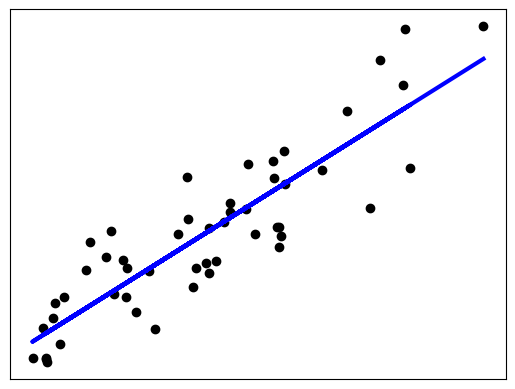

In [14]:
regr = LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y, color = 'black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
import plotly.express as px
fig = px.scatter(x = df_trans.Revenue, y= df_trans.Sales_quantity)
fig.show()

In [22]:
from sklearn.metrics import mean_squared_error
y_res = regr.predict(x)
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y, y_res)

0.008801127621324744

# Test

In [23]:
x_T = df_test.Revenue.values
y_T = df_test.Sales_quantity.values
length = len(x)
x_T = x.reshape(length, 1)
y_T= y.reshape(length, 1)

y_res_T = regr.predict(x_T)
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_T, y_res_T)

0.008801127621324744

In [ ]:
# y = Revenue
# x = SQ, AC, P
# (R, SQ)
# (R, AC)
# (R, P)
# (R, SQ, AC)
# (R, SQ, P)
# (R, AC, P)
# (R, SQ, AC, P)

# Data cleaning
# EDA/Before after
# Hypothesis testing
# Model selection
